In [1]:
# Game of Life

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
a = np.random.randint(2, size=(10, 10), dtype=np.uint8)

In [4]:
# There are few ways we can compute the GoL rules. The simplest is to use for loops to iterate through the rows
# and columns of the array:
b = np.zeros_like(a)
rows, cols = a.shape
for i in range(1, rows-1):
    for j in range(1, cols-1):
        state = a[i, j]
        neighbors = a[i-1:i+2, j-1:j+2]
        k = np.sum(neighbors) - state
        if state:
            if k==2 or k==3:
                b[i, j] = 1
        else:
            if k == 3:
                b[i, j] = 1

In [5]:
# Game of Life entities

from scipy.signal import correlate2d
from Cell2D import Cell2D

class Life(Cell2D):
    """Implementation of Conway's Game of life."""
    kernel = np.array([[1, 1, 1],
                     [1, 10, 1],
                     [1, 1, 1]])
    table = np.zeros(20, dtype=np.uint8)
    table[[3, 12, 13]] = 1
    
    def step(self):
        """Executes one time step."""
        c = correlate2d(self.array, self.kernel, mode='same')
        self.array = self.table[c]

In [6]:
# The following function creates a life object and sets the initial condition using strings of 0 and 1 characters.

def make_life(n, m, row, col, *strings):
    """Makes a life object.
    
    n, m: rows and columns of the life array
    row, col: upper left coordinate of the cells to be added
    strings: list of strings of '0' and '1'
    """
    life = Life(n, m)
    life.add_cells(row, col, *strings)
    return life

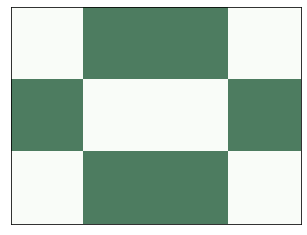

In [7]:
# A beehive is a stable entity, also called a "still life"
# behive
life = make_life(3, 4, 0, 0, '0110', '1001', '0110')
life.draw()

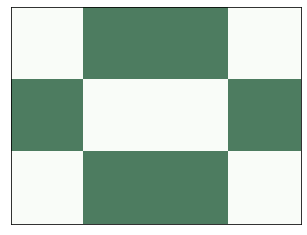

In [8]:
# Here's what it looks like after one step:
life.step()
life.draw()

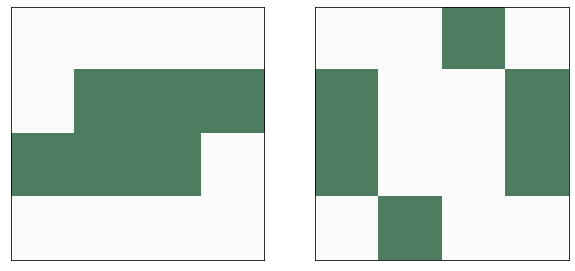

In [9]:
# A toad is an oscillator with period 2. Here are its two configurations:
# toad
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
life = make_life(4, 4, 1, 0, '0111', '1110')
life.draw()

plt.subplot(1, 2, 2)
life.step()
life.draw()

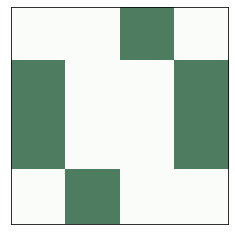

In [19]:
# Here's what the toad looks like as an animation.
life = make_life(4, 4, 1, 0, '0111', '1110')
life.animate(10, 0.5)

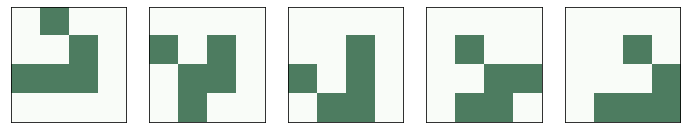

In [11]:
# A glider is a spaceship thath translates one unit down and to the right with period 4.
# glider
plt.figure(figsize=(12, 4))

glider = ['010', '001', '111']
life = make_life(4, 4, 0, 0, *glider)

for i in range(1,6):
    plt.subplot(1, 5, i)
    life.draw()
    life.step()

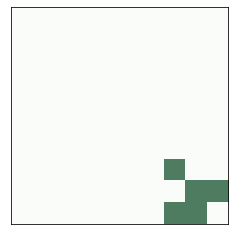

In [12]:
# Here's an animation showing glider movement.
life = make_life(10, 10, 0, 0, '010', '001', '111')
life.animate(frames=28, interval=0.2)

In [13]:
# Exercises

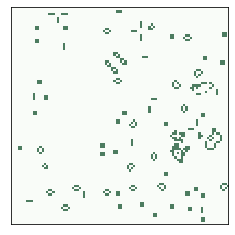

In [14]:
# Exercise 6.1
# Start GoL in a random state and run it until it stabilizes(try 1000 steps).
# Solution
n = 100
life = Life(n)
life.array = np.random.randint(2, size=(n, n), dtype=np.uint8)
life.animate(frames=1000)

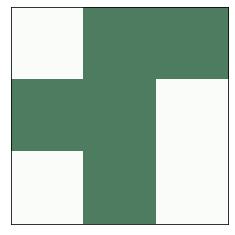

In [15]:
# Methuselas
# Most initial conditions run for a short time and reach a steady state. But some initial conditional run
# for a surprisingly long time; they are called Methuselahs.
# The r-pentomino starts with only five live cells, but it runs for 1103 steps before stabilizing.
# r pentamino
rpent = ['011', '110', '010']
life = make_life(3, 3, 0, 0, *rpent)
life.draw()

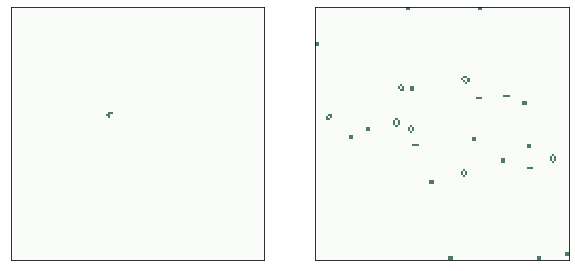

In [16]:
# Here are the start and finish configurations.
# r pentamino
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
life = make_life(120, 120, 50, 45, *rpent)
life.draw()

for i in range(1103):
    life.step()
    
plt.subplot(1, 2, 2)
life.draw()

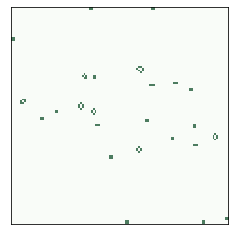

In [17]:
# And here's the animation that shows the steps.
life = make_life(120, 120, 50, 45, *rpent)
life.animate(frames=1200)